## Differential Equations 

### Following is the equation we're finding a solution for:

$\begin{align} 
    f'' = \bigg(- \omega^2 + \frac{l (l+1) (1 - \frac{2M}{r})}{r^2} \bigg) * f
\end{align}$


#### To solve this, we split this equation into a system of two first order equations as follows:

$\begin{align} 
    z = f'
\end{align}$

$\begin{align} 
    z' = \bigg(- \omega^2 + \frac{l (l+1) (1 - \frac{2M}{r})}{r^2} \bigg) * f
\end{align}$

#### Then we use the RK-4 method to solve these two equations simultaneously

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.optimize import fsolve

import module1 as m1 # module1 contains the function to convert r_star to r

In [2]:
class PhotonWaveFunction:
    
    """
    Methods and their descriptions
    
    
    """
    
    def __init__(self, M, omega, l, tol):
        
        self.M = M
        self.omega = omega
        self.l = l
        self.tol = tol
    


    def diff_eq(self, r_star, z_vector):
    
        f = z_vector[0]
        z = z_vector[1]

        f_prime = z

        r = m1.r_star_to_r(r_star, self.M, self.tol)

        z_prime = (-self.omega**2 + ((self.l * (self.l+1) *(1 - (2*self.M)/r)) / (r*r))) * f

        return np.asarray([f_prime, z_prime], dtype = np.complex)
    
    
    
    
    def RK_4(self, r_initial, r_final, N, up):
        
        step_size = (r_final - r_initial) / (N-1)
        
        r_points = np.linspace(r_initial, r_final, N)
        
        #Initial Conditions
        if up == True: #for up scattering states 
            f_i = complex(1.0, 0)
            z_i = complex(0, self.omega)    
            
        elif up == False: #for in scattering states
            f_i = complex(1.0, 0) 
            z_i = complex(0, -self.omega)
        
        
        f_points = [] 
        z_points = []
        
        z_vector = np.asarray([f_i, z_i])
        
        
        for r in r_points:
    
            f_points.append(z_vector[0])
            z_points.append(z_vector[1])


            k1 = step_size * self.diff_eq(r, z_vector)

            k2 = step_size * self.diff_eq(r + 0.5*step_size, z_vector + 0.5*k1)

            k3 = step_size * self.diff_eq(r + 0.5*step_size, z_vector + 0.5*k2)

            k4 = step_size * self.diff_eq(r + step_size, z_vector + k3)

            z_vector += (k1 + 2*k2 + 2*k3 + k4) / 6

        
    
        return(r_points, f_points, z_points)
    
    

In [21]:
#Initialize class 

M = 1.e21  
omega = 1.e-21
l = 6.
tol = 1e-16

try1 = PhotonWaveFunction(M, omega, l, tol)

In [22]:
r_initial = -70.*M
r_final = 500.*M
N = 150000 #number of steps

In [23]:
r_points, f_points, z_points = try1.RK_4(r_initial, r_final, N, up = False)

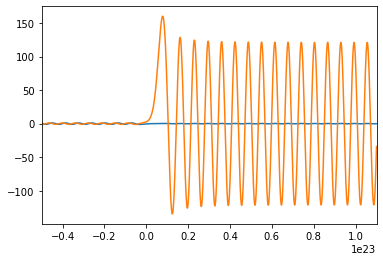

In [24]:
plt.xlim(-50*M, 110*M)
#plt.ylim(0, 5)
plt.plot(r_points, np.real(f_points))
plt.plot(r_points, np.imag(f_points))

In [35]:
M = 1.e21  
omega = 1.e-21
l = 9.
tol = 1e-16

try2 = PhotonWaveFunction(M, omega, l, tol)

In [36]:
r_points2, f_points2, z_points2 = try2.RK_4(r_initial, r_final, N, up = False)

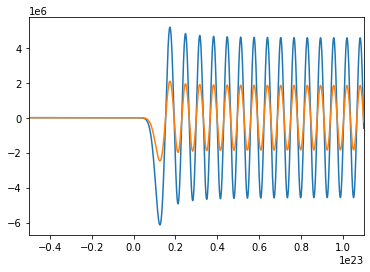

In [37]:
plt.xlim(-50*M, 110*M)
#plt.ylim(0, 5)
plt.plot(r_points2, np.real(f_points2))
plt.plot(r_points2, np.imag(f_points2))